<a href="https://colab.research.google.com/github/cbernet/introduction_machine_learning/blob/master/notebooks/python_crash_course/02_numpy_for_machine_learning_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Die-hard C++ or Fortran users among physicists often say that python is too slow. 

True, python is an interpreted language and it is slow.

Even python advocates like me realize it, but we think that the (lack of) speed of python is not really an issue, e.g. because:

* The time spent computing is balanced by a much smaller development time;
* Profiling is easy, which means that one can find the parts of the code that are slow, optimize them, and even write them in faster languages so that they can be compiled and used from python;

And most importantly: 

* Some python tools like numpy are as fast as plain C. 

In this tutorial, you will understand what is numpy and why it's fast, and learn just what's needed about numpy for the usual machine learning operations. 

At the end, you will work on practical, real-life numpy operations, typically encountered in machine-learning projects.


## Installation

Numpy is the core of scientific python, so it's installed as a dependency for most of the scientific python packages. For example, you will get it if you install scikit-learn, matplotlib, or Keras. Also, numpy is installed by default on the usual platforms as a service for jupyter notebooks, such as Google Colab or FloydHub. 

If you don't have it, you can install it with [Anaconda](https://thedatafrog.com/en/install-anaconda-data-science-python/), by doing: 

```
conda install numpy
```

Then, traditionally, numpy is imported in the following way:

In [85]:
import numpy as np

Please keep importing as `np`, it will make your code clearer to you and other people.

## The numpy array : Why is it fast? 

The main purpose of numpy is to provide a very efficient data structure called the numpy array, and the tools to manipulate such arrays. 

Why is the numpy array so fast? 

Because, under the hood, arrays are processed with compiled code, optimized for the CPU. In particular, numpy operations are parallel as they use [SIMD](https://en.wikipedia.org/wiki/SIMD) (Single Operation Multiple Data). 

To see how fast numpy is, we can time it. 

Let us create a large list with one million integers, and a numpy array from this list: 

In [86]:
lst = range(1000000)
arr = np.array(lst)
arr

array([     0,      1,      2, ..., 999997, 999998, 999999])

Now let's compute the square of all integers, and see how much time it takes. 

We start by the list: 

In [87]:
%timeit squares = [x**2 for x in lst]

1 loop, best of 3: 307 ms per loop


And we do the same for the array:

In [88]:
%timeit squares = arr**2

100 loops, best of 3: 2.87 ms per loop


As you can see, this is more than 300 times faster. 

We can in principle loop on the numpy array like this:

In [89]:
%timeit squares = [x**2 for x in arr]

1 loop, best of 3: 330 ms per loop


But then, we completely lose the benefits of numpy! Indeed, when we do `arr**2` we use the square function of numpy, which is intrinsically parallel. When we loop, we process the elements one by one with basic python. So: 

**Never ever loop on a numpy array! You'll be tempted to do so, but there should be no exception!**

## Numpy array data types

We have seen that numpy arrays are processed by compiled code with SIMD. 

For this to work, the elements in a numpy array must be: 

* of a basic type, e.g. integers or floats. The full range of possibilities is given on [this page](https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html);
* of the same type, so that they have the same size, e.g. 64 bits floats, or 16 bits integers.

On the contrary, python lists can contain heterogeneous objects of any type. 

Here are a few ways to create numpy arrays with different types:

In [90]:
from sys import getsizeof as sizeof

# numpy guesses that it should use integers
x = np.array([0, 1, 2])
print(x.dtype)
# or floats: 
x = np.array([0., 1., 2.])
print(x.dtype)
# here we specify a python compatible type,
# interpreted by numpy as int64
x = np.array([0., 1., 2.], dtype=int)
print(x.dtype)
# here we specify that we want 8 bits integers
x = np.array([0, 1, 2], dtype=np.int8)
print(x.dtype)

int64
float64
int64
int8


This makes it easy to estimate the size of a numpy array in memory, to see if you're going to blow up your computer before you actually do. 

---

*Exercise*

For example, let's consider a sample of 1000 images, each with 200x200 pixels, and 3 color channels per pixel. 
The color index ranges from 0 to 255, and can thus be encoded as an 8 bit integer. 

Assuming you store the data of all images in a single numpy array, what would be its size in memory in GB? 

--- 

**answer** : 0.1 GB

In [91]:
nbits = 1000 * 200**2 * 3 * 8
gbytes = nbits / 1024**3 / 8 
print(gbytes)

0.11175870895385742


## Numpy element wise operations

I call element wise operations all the operations that affect the array elements, but preserve the array shape.

All the usual operators are implemented in numpy, for arrays. For example: 

In [92]:
x = np.array(range(5))
x**2

array([ 0,  1,  4,  9, 16])

Note that these operators, in numpy, are element wise:

In [93]:
x+1

array([1, 2, 3, 4, 5])

The element-wise equivalents of the functions in the python `math` package are available directly from the `numpy` package, with the same name, e.g.:

In [94]:
np.exp(x)

array([ 1.        ,  2.71828183,  7.3890561 , 20.08553692, 54.59815003])

Finally, binary operators are available: 

In [95]:
x = np.array([0, 1, 2])
y = np.array([1, 2, 3])
x+y

array([1, 3, 5])

In [96]:
x*y

array([0, 2, 6])

## Numpy array shape

So far, we have only seen arrays with a single dimension. But often, more dimensions are used. 

Multidimensional arrays can be created from a list of lists, e.g.:

In [97]:
x = np.array([[0, 1], [2, 3], [4,5]])
x

array([[0, 1],
       [2, 3],
       [4, 5]])

The shape attribute gives us the length of each dimension: 

In [98]:
x.shape

(3, 2)

In this case, we have 3 rows of 2 numbers. The first dimension is the outermost dimension, and the second one the innermost dimension. 

Let's take the example of a 2x2 pixels image, with 3 color channels (red, blue, green) in each pixel:

In [99]:
x = np.array(
    [
        [ [1,2,3], [4,5,6], ],
        [ [7,8,9], [10,11,12]]
    ]
)
print(x)
print(x.shape)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
(2, 2, 3)


To visualize numpy arrays more easily, I often think of the innermost dimension separately. For example, here, we have a 2x2 pixel array, with a sub-array of size 3 in each pixel.

And as a final example, let's consider a "column vector": 

In [100]:
x = np.array([
    [0],
    [1],
    [2], 
    [3]
])
print(x)
print(x.shape)

[[0]
 [1]
 [2]
 [3]]
(4, 1)


As you can see, the "column vector" has two dimensions, which may be counterintuitive. There is a single number (a scalar) on the innermost dimension.


Please note that in numpy, a dimension can also be called an "axis". 

Very often, numpy arrays of a given shape are built by initializing all elements to a fixed number, or a random number. For example:

In [101]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [102]:
np.ones(3)

array([1., 1., 1.])

In [103]:
np.ones_like(x)

array([[1],
       [1],
       [1],
       [1]])

In [104]:
np.random.rand(2,2)

array([[0.83656477, 0.01235059],
       [0.64045123, 0.09117495]])

Many more [random sampling tools](https://docs.scipy.org/doc/numpy-1.16.0/reference/routines.random.html) are available. 

## Numpy array indexing

### Basic indexing

Here is a 1D array: 

In [105]:
x = np.arange(10) + 1
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Elements can be accessed directly, using their index in the array (the index starts at 0):

In [106]:
x[1]

2

And, as usual in python sequences, negative arrays start from the end: 

In [107]:
x[-2]

9

The array can be modified in place: 

In [108]:
print(id(x))
x[1] = 0
print(id(x))
print(x)

140100337914304
140100337914304
[ 1  0  3  4  5  6  7  8  9 10]


For multidimensional arrays, basic indexing is done by specifying a comma separated list of indices: 

In [109]:
x = np.zeros((2,3))
x[0,1] = 1
x

array([[0., 1., 0.],
       [0., 0., 0.]])

### Selection with boolean indexing

Indexing can be used to select array elements according to a mask. 

Let's create our 1D array again:

In [110]:
x = np.arange(10) + 1
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

To create a mask, we evaluate a boolean expression for each element in the array. For example, to find all even numbers: 

In [111]:
x%2 == 0

array([False,  True, False,  True, False,  True, False,  True, False,
        True])

What does this expression mean? 

Since `x` is a numpy array, `x%2` is a numpy element-wise operation that evaluates `%2` on all elements of the array, and returns a new array with the results: 

In [112]:
xmod = x%2
xmod

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

Then, we select even numbers by asking the modulo to be equal to zero. Again, the `==` operator is applied to a numpy array, so it is an element-wise operation:  

In [113]:
mask = (xmod == 0)
mask

array([False,  True, False,  True, False,  True, False,  True, False,
        True])

With this mask, we select even numbers and return a new array: 

In [114]:
x[mask]

array([ 2,  4,  6,  8, 10])

In fact, the new array is a view on the original array. **The data is not copied.**

It is possible to invert the mask: 

In [115]:
x[~mask]

array([1, 3, 5, 7, 9])

And of course it's possible to build masks on the fly, which is what is typically done: 

In [116]:
x[x%2==0]

array([ 2,  4,  6,  8, 10])

**In python data science, boolean indexing is used extensively to select data by applying thresholds on chosen variables.** 

### Slicing

In basic python, a slice is defined as a tuple, `start,stop,step`. It allows to select a sequence of elements in a sequence (which, by essence in python, is 1D): 

In [117]:
lst = list(range(1, 10))
print(lst)
lst[1::2]

[1, 2, 3, 4, 5, 6, 7, 8, 9]


[2, 4, 6, 8]

We selected elements: 

* starting at index 1 (value 2);
* stopping after the end of the list, as `stop` is not specified. At this stage, the last element, 9, is included;
* in steps of 2. So 9 does not appear. 

---

*Exercise:*

Play with the slice definition in the cell above. Try to: 

* select all odd numbers with a slice 
* select all numbers larger or equal to 5
* select all even numbers between 2 and 6

---

**Answers**: 

In [120]:
lst[::2]

[1, 3, 5, 7, 9]

In [122]:
lst[4:]

[5, 6, 7, 8, 9]

In [123]:
lst[1:6:2]

[2, 4, 6]

In the example above, we decided not to specify stop. This is possible for all fields: 

In [ ]:
print( lst[:5:] )
print( lst[::2] )
print( lst[3::] )
print( lst[::] )

[1, 2, 3, 4, 5]
[1, 3, 5, 7, 9]
[4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


The notation for these can and should be simplified to: 

In [ ]:
print( lst[:5] )
print( lst[::2] )
print( lst[3:] )
print( lst[:] )

[1, 2, 3, 4, 5]
[1, 3, 5, 7, 9]
[4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


---

*Exercise:*

Could you simplify these expressions further by removing more colons? What would happen if you do? Test your hypotheses in the above cell.

---

**Answer:**

No way to simplify further. For example, if we remove a colon to `lst[:5]`, it becomes `lst[5]`, so it's not the same thing at all. The first notation returns the first 5 elements, while the second one returns the sixth element:

In [124]:
lst[5]

6

Numpy slicing is a simple generalization of python slicing to multiple dimensions. To test it, we create a 2D matrix with 4 lines and 5 columns. For this, we use the reshape method that will be discussed in the next section: 

In [125]:
x = np.arange(20).reshape(4,5)
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

We can now use the slice notation on any field of the multidimensional index. Here are a few example: 

* select the second column: 

In [126]:
x[:, 1]

array([ 1,  6, 11, 16])

* select the first two columns: 

In [127]:
x[:, :2]

array([[ 0,  1],
       [ 5,  6],
       [10, 11],
       [15, 16]])

* select columns in steps of 2: 

In [128]:
x[:, ::2]

array([[ 0,  2,  4],
       [ 5,  7,  9],
       [10, 12, 14],
       [15, 17, 19]])

* reverse column order, by specifying a -1 step on the last dimension:

In [129]:
x[:, ::-1]

array([[ 4,  3,  2,  1,  0],
       [ 9,  8,  7,  6,  5],
       [14, 13, 12, 11, 10],
       [19, 18, 17, 16, 15]])

In the previous examples, we have been working on the last dimension, while preserving the first dimension. For this, we needed to add a `:` as first indexing item to request a loop on the first dimension. 

But this can become painful when there are more than 2 dimensions. For example, consider this 3D array: 

In [130]:
y = np.arange(8).reshape((2,2,2))
y

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

It's a 2x2x2 cube. If you want to select the first elements along the last dimension, you can either do: 

In [131]:
y[:,:,0]

array([[0, 2],
       [4, 6]])

Or use the **ellipsis** notation: 

In [132]:
y[...,0]

array([[0, 2],
       [4, 6]])

The ellipsis adds as many `:` as missing dimensions in the indexing statement. In this way, you don't need to keep track of the number of dimensions, and you type less. But most importantly, your code becomes independent of the number of dimensions in the array. For example in this case, `y[...,0]` selects the first elements along the last dimension whatever the dimension of y:  

In [133]:
y = np.arange(8).reshape(2,4)
print(y)
print(y[...,0])

[[0 1 2 3]
 [4 5 6 7]]
[0 4]


## Numpy array reshaping 

Reshaping an array consists in re-organizing the array data into a new array with a different shape.

First, reshaping makes it possible to easily create an array with a given shape, as we have done before: 

In [134]:
x = np.arange(20).reshape(4,5)
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

We created a flat 1D array with integers ranging from 0 to 19, and immediately reshaped it to a 2D array with shape `(4,5)`. 

### Making an array one-dimensional 

Often, one needs to flatten an array. This can be done in several ways: 

* flatten: 

In [135]:
y = x.flatten()
y

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

* ravel: 

In [136]:
x.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

* reshape: 

In [137]:
x.reshape(-1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

The output is the same, so what's the difference between flatten, ravel, and reshape? 

First, flatten always returns a copy of the array.

On the other hand, ravel attempts to return a view on the original array, and only copies the data when it's needed. 
This means that if you modify the output of ravel, you might modify the original array. Also, it means that you should use ravel on very big arrays to save memory, and that ravel will generally be faster than flatten. 

reshape is a more flexible function as you can reshape to anything. Just like ravel, it returns a view and only performs a copy when necessary. I suggest to use either flatten or ravel when you want to flatten an array, to make your code more explicit. 

### Turn a 1D array into a "column" 1D array

This means that we want to turn an array of shape `(N,)` into an array of shape `(N,1)`. Let's consider an array of shape `(5,)` : 

In [138]:
y = np.arange(5)
print(y)
print(y.shape)

[0 1 2 3 4]
(5,)


We turn it into a columnar array of shape (20,1) with the `c_` attribute (note that it's not a function!)

In [139]:
coly = np.c_[y]
print(coly)
print(coly.shape)

[[0]
 [1]
 [2]
 [3]
 [4]]
(5, 1)


## Practical numpy examples in machine learning

You should know enough about numpy to deal with most numpy operations encountered in machine learning projects. 

We will now work on real-life examples so that you can hone your numpy skills!

### Label management  

Let's consider a practical supervised machine learning example, the classification of dog and cat pictures. 
The machine is presented with examples so that it can learn. Each example consists in: 

* example data, here an image of a dog or a cat
* a target or label, e.g. 0 for dog and 1 for cat

When presented a cat image, the machine will output a value between 0 and 1. We'll compare this value to the target, and update the machine parameters so that next time, it can get closer to the solution. 

The training dataset (the set of examples used for training) is typically stored in numpy arrays. For example, one could use two numpy arrays: 

* An array of shape `(10000, 200, 200, 3)` for the images, assuming we have 10000 color pictures of 200x200 pixels.
* An array of shape `(10000,)` or of shape `(10000, 1)` for the targets. 

The exact structure of the dataset will depend on where you get it or how you build it, and sometimes you will have to change this structure to provide the dataset to the machine, depending on how the machine is implemented.  

As a practical case, let's use the simplified MNIST handwritten digit dataset included in the scikit-learn machine learning package. We first load the dataset: 

In [140]:
from sklearn import datasets
digits = datasets.load_digits()

We get some object called `digits`. We can use the `type` and `dir` built-in functions to see what it is: 

In [141]:
print( type(digits) ) 
print( dir(digits) )

<class 'sklearn.utils.Bunch'>
['DESCR', 'data', 'images', 'target', 'target_names']


Ok, `Bunch` is some unknown class in scikit-learn, but its attributes have rather explicit names. Let's print some more information: 

In [142]:
print( type(digits.images) )
print( type(digits.target) )

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Two numpy arrays! You should start to feel at home. Let's print their shape:

In [143]:
print( digits.images.shape )
print( digits.target.shape )

(1797, 8, 8)
(1797,)


---

*Exercises*

1. How many examples do you have? What is the size of the images in pixels? Are they color or black and white images? 
2. Print the first image and the first label

**Answers**: 

1. We have 1797 examples. Each image has 8x8=64 pixels. There is only one value for each pixel, so these are black and white images.
2. The first image is a zero:

In [144]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [145]:
print(digits.target[0])

0


3. Scikit-learn machines expect a 1D array of labels, such as the one we have here. But Keras+Tensorflow expects a columnar array of labels. Convert the array of labels into an array suitable for Keras+Tensorflow:

**Answer**: 

Two possibilities: 

In [147]:
np.c_[digits.target]

array([[0],
       [1],
       [2],
       ...,
       [8],
       [9],
       [8]])

In [146]:
digits.target[:, np.newaxis]

array([[0],
       [1],
       [2],
       ...,
       [8],
       [9],
       [8]])

---

### Accuracy calculation

Accuracy is a measure of performance for classification algorithms. It is defined the probability to misclassify an example and calculated as 

$$
a = 1 - \frac{M}{N}, 
$$

where $N$ is the total number of examples, and $M$ the number of misclassified examples.

After training, the accuracy is computed on a test dataset separate from the training dataset. In practice, the whole test dataset is sent as a numpy array to the machine, which produces a numpy array containing the results of the evaluation for each example in the test dataset. The accuracy is then computed from this output and the labels for the test dataset. 

Let us assume we're still working on the MNIST handwritten digits dataset and that the test dataset contains 10 examples, with the following labels: 

In [156]:
true_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
true_labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

And let's assume that the output of our machine for these 10 examples is:

In [157]:
results = np.array([0, 1, 2, 8, 4, 5, 6, 7, 8, 9])
results

array([0, 1, 2, 8, 4, 5, 6, 7, 8, 9])

--- 

**Exercise:**

Compute the accuracy in per cent. For this, note that you can sum up all entries in a numpy array `x` by doing `x.sum()`. No loop allowed! 

**Answer:**

In [159]:
(1-np.sum(results != true_labels)/10.) * 100

90.0

---

### Rescaling image color levels 

Neural networks don't work well with big numbers. 

So usually, the neural network inputs are rescaled to be of the order of unity before being fed to the neural network.

Let's consider again the MNIST dataset, that is already loaded in this notebook as `digits`, and here is the first image: 


In [160]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

--- 

**Exercise**

1. what is the largest greyscale level that can be found in `digits.images`?
2. rescale the dataset so that the largest number is 1. 
3. check your results

No loop allowed! 

**Answers:**

In [161]:
np.max(digits.images)

16.0

In [163]:
rescaled = digits.images / 16
np.max(rescaled)

1.0

---

### Standardizing neural network inputs

We already know that neural networks don't like to deal with large numbers. And it's also not good to have widely different shapes for the distributions of the input variables. 

So usually, we standardize the input variables. A common choice is to set the mean of each input distribution to 0, and its standard deviation to 1. 

Let's build a toy dataset with 1000 entries and two input variables following a gaussian probability density function.

First, we generate the dataset. 

For this, we draw a random sample of 1000 events for each variable. Note the large difference in mean and sigma:


In [164]:
x = np.random.normal(100, 5, 1000)
y = np.random.normal(10, 1, 1000)

Then, we stack the two variables in a single numpy array: 

In [165]:
dataset = np.c_[x, y]
print(dataset.shape)
dataset

(1000, 2)


array([[ 95.72883762,  12.1769199 ],
       [107.07999097,   9.74554777],
       [101.49385895,  11.06108033],
       ...,
       [102.57764422,   9.85699746],
       [105.23824571,   9.90234579],
       [108.58447046,  10.84076562]])

And finally, we check that the mean and standard deviation of each variable is as expected: 

In [166]:
print(np.mean(dataset, axis=0))
print(np.std(dataset, axis=0))

[99.82819661 10.01263392]
[4.86946265 1.01085211]


By using `axis=0`, we asked for the mean and standard deviation to be computed along the first axis, which is the outermost dimension. Therefore, numpy computed these quantities for both columns separately. 

Take enough time to think about this, and to understand how you move in the 2D array when you stride the outermost dimension. 

---

*Exercise*

1. Rescale the dataset so that the mean and standard deviation of both variables are set to 0 and 1, respectively. But: 

   * no loop allowed of course!  
   * you're also not allowed to treat the two columns separately to stack them after the fact as we have done above
   * only one (short) line of code

**Answer:**

In [169]:
rescaled = (dataset - np.mean(dataset, axis=0)) / np.std(dataset, axis=0) 
print(np.mean(rescaled, axis=0), np.std(rescaled, axis=0))

[-1.44695367e-14  1.85315097e-14] [1. 1.]


2. there is a way to recreate the dataset in one line of code. Check the documentation of [numpy.random.normal](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html) and do it: 

**Answer:**

In [173]:
np.random.normal((100, 10), (5,1), (1000, 2))

array([[ 98.91565744,   9.64162794],
       [ 90.29506409,  10.29653739],
       [ 98.83523869,   9.19011217],
       ...,
       [106.13543262,  11.45251923],
       [104.26851285,  10.69301971],
       [ 97.50688162,   9.69950924]])

---

### Changing color scheme from RGB to BGR

By convention, TensorFlow considers that the color channels in an image are ordered as red, green, blue (RGB) along the innermost dimension. On the contrary, Caffe, another deep learning library, assumes colors to be in the reverse order (BGR).

Let's assume you want to do transfer learning, and that the deep neural network you want to use has been pre-trained with Caffe. But your images are RGB... Obviously, you need to convert your images from RGB to BGR so that the network can make use of its knowledge of colors.  

In this exercise, you will find out how to do this on a single image.

First, let's load the "face" example image: 

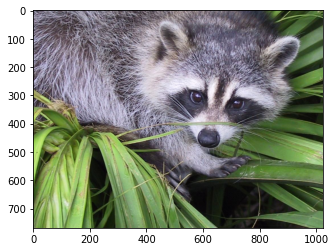

In [174]:
import scipy.misc
import matplotlib.pyplot as plt
face = scipy.misc.face()
plt.imshow(face)

---

*Exercise* 

* find out about the number of pixels and colors in this image
* make sure that red is the first channel. To do this: 
    * make a copy of face
    * in the copy, set the last two color channels to zero 
    * display the copy
* convert the image to BGR 

Hint: you will have to make good use of the slice notation. Also, try to use the ellipsis.

**Answer:**

In [175]:
face.shape

(768, 1024, 3)

So 768x1024 pixels, 3 colors

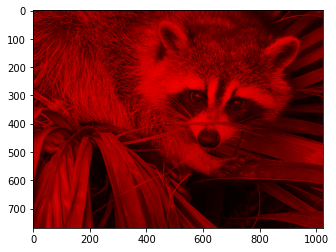

In [177]:
face_copy = np.copy(face)
face_copy[... ,1:] = 0
plt.imshow(face_copy)

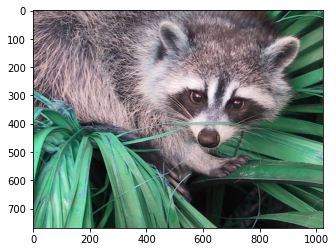

In [178]:
face_bgr = face[..., ::-1]
plt.imshow(face_bgr)

## Conclusion

Well done! you're now an experienced numpy user! 

Your new skills will prove useful, even out of the field of machine learning. 

Just one word of caution for the future: **Don't reinvent the wheel**. It's highly probable that what you'll need has already been implemented by others using numpy. So don't hesitate to have a look at existing scientific python packages before starting to code. For example: 

* [scikit-image](https://scikit-image.org/) provides image manipulation tools 
* [opencv](https://pypi.org/project/opencv-python/) is a full-fledged computer vision library, and comes with many tools as well. 
* [scikit-learn](https://scikit-learn.org/stable/) has methods for typical array manipulation in machine learning, 
* [keras](https://keras.io/) provides preprocessing tools if you use Keras+TensorFlow for deep learning
* PyTorch also has many preprocessing functions, in the [torchvision](https://pytorch.org/docs/stable/torchvision/transforms.html), [torchaudio](https://pytorch.org/audio/), and [torchtext](https://pytorch.org/text/).
